In [2]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web

In [3]:
style.use('ggplot')
start=dt.datetime(2000,1,1)
end=dt.datetime(2016,12,31)

In [4]:
df=web.DataReader('TSLA','yahoo',start,end)

In [5]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-06-29,25.00,17.540001,19.000000,23.889999,18766300,23.889999
2010-06-30,30.42,23.299999,25.790001,23.830000,17187100,23.830000
2010-07-01,25.92,20.270000,25.000000,21.959999,8218800,21.959999
2010-07-02,23.10,18.709999,23.000000,19.200001,5139800,19.200001
2010-07-06,20.00,15.830000,20.000000,16.110001,6866900,16.110001


In [6]:
#salvar para um csv o dataframe
df.to_csv('tsla.csv')

In [7]:
#formatando para o index ser a data  e nao numero
df2=pd.read_csv('tsla.csv',parse_dates=True,index_col=0)

In [8]:
df2.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-06-29,25.00,17.540001,19.000000,23.889999,18766300,23.889999
2010-06-30,30.42,23.299999,25.790001,23.830000,17187100,23.830000
2010-07-01,25.92,20.270000,25.000000,21.959999,8218800,21.959999
2010-07-02,23.10,18.709999,23.000000,19.200001,5139800,19.200001
2010-07-06,20.00,15.830000,20.000000,16.110001,6866900,16.110001


In [9]:
df2[['Open','High']].head()

,Open,High
Date,,
2010-06-29,19.000000,25.00
2010-06-30,25.790001,30.42
2010-07-01,25.000000,25.92
2010-07-02,23.000000,23.10
2010-07-06,20.000000,20.00


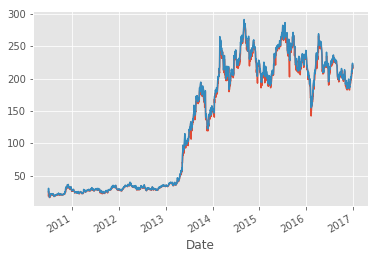

In [10]:
#imprimindo apenas uma coluna
df2['Open'].plot()
df2['High'].plot()

In [11]:
#cria uma nova coluna com a media de 100 dias "100 moving average"
df2['100ma']=df['Adj Close'].rolling(window=100,min_periods=0).mean()
#para tirar os nan do começo da tabela nos 100 primeiros valores
#df2.dropna(inplace=True)
#mas com o min_periods nao precisa do dropna, ele vai aparecer o valor atual da coluna referencia

In [12]:
df2.head()

,High,Low,Open,Close,Volume,Adj Close,100ma
Date,,,,,,,
2010-06-29,25.00,17.540001,19.000000,23.889999,18766300,23.889999,23.889999
2010-06-30,30.42,23.299999,25.790001,23.830000,17187100,23.830000,23.860000
2010-07-01,25.92,20.270000,25.000000,21.959999,8218800,21.959999,23.226666
2010-07-02,23.10,18.709999,23.000000,19.200001,5139800,19.200001,22.220000
2010-07-06,20.00,15.830000,20.000000,16.110001,6866900,16.110001,20.998000


In [13]:
df2.tail()

,High,Low,Open,Close,Volume,Adj Close,100ma
Date,,,,,,,
2016-12-23,213.449997,207.710007,208.000000,213.339996,4662900,213.339996,202.6190
2016-12-27,222.250000,214.419998,214.880005,219.529999,5915700,219.529999,202.5082
2016-12-28,223.800003,217.199997,221.529999,219.740005,3782500,219.740005,202.4053
2016-12-29,219.199997,214.119995,218.559998,214.679993,4035900,214.679993,202.2905
2016-12-30,217.500000,211.679993,216.300003,213.690002,4642600,213.690002,202.1366


<BarContainer object of 1640 artists>

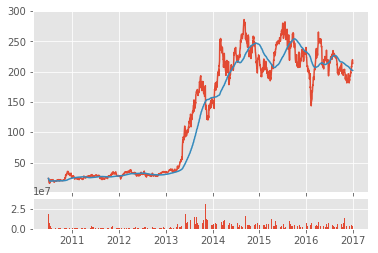

In [14]:
ax1=plt.subplot2grid((6,1),(0,0),rowspan=5,colspan=1)
ax2=plt.subplot2grid((6,1),(5,0),rowspan=1,colspan=1,sharex=ax1)#sharex pro ax2 seguir o zoom do ax1
ax1.plot(df2.index,df2['Adj Close'])
ax1.plot(df2.index,df2['100ma'])
ax2.bar(df2.index,df2['Volume'])

In [15]:
#resamplig uma amostra
#olhc = open / high / low / close
df_ohlc=df2['Adj Close'].resample('10D').ohlc()
df_volume=df2['Volume'].resample('10D').sum()

In [16]:
df_ohlc.head()

,open,high,low,close
Date,,,,
2010-06-29,23.889999,23.889999,15.800000,17.459999
2010-07-09,17.400000,20.639999,17.049999,20.639999
2010-07-19,21.910000,21.910000,20.219999,20.719999
2010-07-29,20.350000,21.950001,19.590000,19.590000
2010-08-08,19.600000,19.600000,17.600000,19.150000


In [17]:
#from matplotlib.finance import candlestick_ohlc
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates

In [18]:
#we need reset the index to use candlestick_ohlc
df_ohlc.reset_index(inplace=True)

In [19]:
df_ohlc['Date']=df_ohlc['Date'].map(mdates.date2num)

In [20]:
df_ohlc.head()

,Date,open,high,low,close
0,733952.0,23.889999,23.889999,15.800000,17.459999
1,733962.0,17.400000,20.639999,17.049999,20.639999
2,733972.0,21.910000,21.910000,20.219999,20.719999
3,733982.0,20.350000,21.950001,19.590000,19.590000
4,733992.0,19.600000,19.600000,17.600000,19.150000


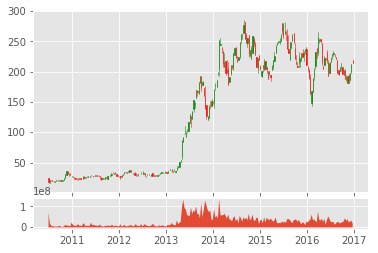

In [21]:
ax1=plt.subplot2grid((6,1),(0,0),rowspan=5,colspan=1)
ax2=plt.subplot2grid((6,1),(5,0),rowspan=1,colspan=1,sharex=ax1)
ax1.xaxis_date()
candlestick_ohlc(ax1,df_ohlc.values,width=2,colorup='g')
ax2.fill_between(df_volume.index.map(mdates.date2num),df_volume.values,0)